# Parch and Posey

Parch and Posey, a company that sells paper. They have fifty sales reps spread across the US in four regions. They sell three types of papers: regular, poster and glossy. Their clients are primarily large forture 100 companies who they attract by advertising on Google, Facebook and Twitter.

Example of questins we’d like to answer: Which product line is worst performin? Which of their marketing channels they should make a big investment in.

Parch and Posey database has five tables: 
- accounts: all client accounts
- region: geographic regions of the market
- sales_rep: inforamation related to sales representatives in different regions
- web_events: advertising information
- orders: all data related to order
Entity relationship diagram of the tables: 
![ERD](erd.png "ERD")



In [16]:
#load all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
#load the data files
accounts = pd.read_csv('accounts.csv')
region = pd.read_csv('region.csv')
sales_rep = pd.read_csv('sales_rep.csv')
web_events = pd.read_csv('web_events.csv')
orders = pd.read_csv('orders.csv')

In [6]:
#try peeping the data
accounts.head()

,id,name,website,lat,long,primary_poc,sales_rep_id
0,1001,Walmart,www.walmart.com,40.238496,-75.103297,Tamara Tuma,321500
1,1011,Exxon Mobil,www.exxonmobil.com,41.169156,-73.849374,Sung Shields,321510
2,1021,Apple,www.apple.com,42.290495,-76.084009,Jodee Lupo,321520
3,1031,Berkshire Hathaway,www.berkshirehathaway.com,40.949021,-75.763898,Serafina Banda,321530
4,1041,McKesson,www.mckesson.com,42.217093,-75.284998,Angeles Crusoe,321540


In [7]:
region.head()

,id,name
0,1,Northeast
1,2,Midwest
2,3,Southeast
3,4,West


In [8]:
sales_rep.head()

,id,name,region_id
0,321500,Samuel Racine,1
1,321510,Eugena Esser,1
2,321520,Michel Averette,1
3,321530,Renetta Carew,1
4,321540,Cara Clarke,1


In [9]:
web_events.head()

,id,account_id,occurred_at,channel
0,1,1001,2015-10-06T17:13:58.000Z,direct
1,2,1001,2015-11-05T03:08:26.000Z,direct
2,3,1001,2015-12-04T03:57:24.000Z,direct
3,4,1001,2016-01-02T00:55:03.000Z,direct
4,5,1001,2016-02-01T19:02:33.000Z,direct


In [10]:
orders.head()


,id,account_id,occurred_at,standard_qty,gloss_qty,poster_qty,total,standard_amt_usd,gloss_amt_usd,poster_amt_usd,total_amt_usd
0,1,1001,2015-10-06T17:31:14.000Z,123,22,24,169,613.77,164.78,194.88,973.43
1,2,1001,2015-11-05T03:34:33.000Z,190,41,57,288,948.10,307.09,462.84,1718.03
2,3,1001,2015-12-04T04:21:55.000Z,85,47,0,132,424.15,352.03,0.00,776.18
3,4,1001,2016-01-02T01:18:24.000Z,144,32,0,176,718.56,239.68,0.00,958.24
4,5,1001,2016-02-01T19:27:27.000Z,108,29,28,165,538.92,217.21,227.36,983.49


# Posing questions to ask and report
- What is the total revenue trend?
- Revenue broken down in Regions.
- Revenue broken down in products. (Which product brings the most revenue?)
- Does a certain product sell more in a certain region?
- Who are the top 5 (or 10) top performing sales rep.
- Fractions of revenue generated by sales rep.
- Top performing sales rep per product and region
- Which web advertizing channel is doing best?

In [51]:
# add a new column year for easy manupulation
orders['year'] = orders['occurred_at'].apply(lambda x: x[:4])

In [52]:
orders.head()


,id,account_id,occurred_at,standard_qty,gloss_qty,poster_qty,total,standard_amt_usd,gloss_amt_usd,poster_amt_usd,total_amt_usd,year
0,1,1001,2015-10-06T17:31:14.000Z,123,22,24,169,613.77,164.78,194.88,973.43,2015
1,2,1001,2015-11-05T03:34:33.000Z,190,41,57,288,948.10,307.09,462.84,1718.03,2015
2,3,1001,2015-12-04T04:21:55.000Z,85,47,0,132,424.15,352.03,0.00,776.18,2015
3,4,1001,2016-01-02T01:18:24.000Z,144,32,0,176,718.56,239.68,0.00,958.24,2016
4,5,1001,2016-02-01T19:27:27.000Z,108,29,28,165,538.92,217.21,227.36,983.49,2016


In [53]:
# group by year
order_total = orders.groupby('year').sum().reset_index()

In [54]:
order_total

,year,id,account_id,standard_qty,gloss_qty,poster_qty,total,standard_amt_usd,gloss_amt_usd,poster_amt_usd,total_amt_usd
0,2013,344889,261339,26554,20686,11070,58310,132504.46,154938.14,89888.40,377331.00
1,2014,4517678,3467696,353967,171829,125100,650896,1766295.33,1286999.21,1015812.00,4069106.54
2,2015,5790297,4475745,477789,263251,171932,912972,2384167.11,1971749.99,1396087.84,5752004.94
3,2016,13139696,10123207,1074751,553815,413034,2041600,5363007.49,4148074.35,3353836.08,12864917.92
4,2017,98768,74265,5285,4192,2510,11987,26372.15,31398.08,20381.20,78151.43


Text(0.5,1,u'Revenue Trend')

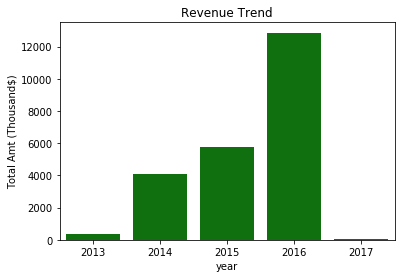

In [55]:
order_total['total_amt_usd'] = order_total['total_amt_usd']/1000.00
sns.barplot(x='year',y='total_amt_usd', data = order_total, ci=None, color='green')
plt.ylabel('Total Amt (Thousand$)')
plt.title('Revenue Trend')

Since it was early January of 2017, the turnover for 2017 is still not realized. Otherwise, the barplot shows the growth in revenue for the years.

We cant't simple break down the revenue into regions since the orders are only associated with client company, for which only a physical GPS coordinate is recorded. It will be a significant work to map those coordinates into geographical regions.

We can however break down the revenue into different products.


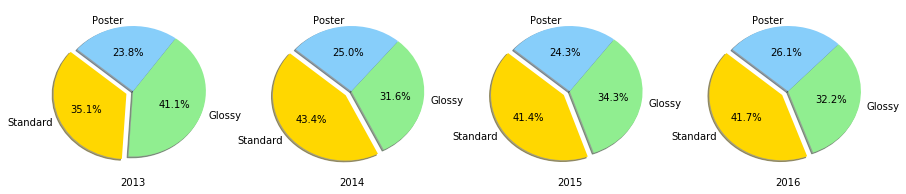

In [88]:
# create a column for each
# Data to plot
fix, axes = plt.subplots(1,4, figsize=(15,3))
xlabels = list(order_total['year'])
pielabels = ['Standard', 'Glossy', 'Poster']
colors = ['gold', 'lightgreen', 'lightskyblue']
explode = (0.1, 0, 0)  # explode 1st slice

for i in range(0,4):
    revenue_temp = order_total.iloc[i]
    revenue_split = [revenue_temp.standard_amt_usd, revenue_temp.gloss_amt_usd, revenue_temp.poster_amt_usd]
    #print revenue_split
    axes[i].pie(revenue_split, explode=explode, labels=pielabels, 
                colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    axes[i].set_xlabel(xlabels[i])


It appears that the revenue share changed from 2013 to 2014, but then stayed almost same from 2014 to 2016. In 2013 Glossy had the highest revenue share followed by Standard, that changed in 2014 with Standard taking the highest spot.

Does a certain product sell more in a certain region? This is difficult to answer as before since the order table does not have any link to region information. We can however, answer who are the top 5 clients.

In [176]:
# Top clients
# group by year, standard_amt_usd	gloss_amt_usd	poster_amt_usd	total_amt_usd
order_clients = orders[['account_id','standard_amt_usd', 'gloss_amt_usd', 'poster_amt_usd', 'total_amt_usd']]
client_total = order_clients.groupby('account_id').sum().reset_index()

In [177]:
client_total.sort_values(by=['total_amt_usd'], ascending=False).head(5)

,account_id,standard_amt_usd,gloss_amt_usd,poster_amt_usd,total_amt_usd
320,4211,87265.12,242990.58,52617.60,382873.30
314,4151,70373.97,120274.42,154970.20,345618.59
30,1301,78832.02,112724.50,135262.96,326819.48
86,1871,67779.17,141216.46,91699.16,300694.79
310,4111,49081.64,82225.22,162554.28,293861.14


In [188]:
# we can print the names of these companies
top5 = client_total.sort_values(by=['total_amt_usd'], ascending=False)[:5]['account_id']
for t in top5:
    selrow = accounts[accounts['id']==t]['name'].tolist()
    print(selrow[0])

EOG Resources
Mosaic
IBM
General Dynamics
Republic Services


Using the same line of datapath we can find the top 5 sales rep. (Sales rep for these top 5 companies.)

In [195]:
# we can print the names of these companies
top5 = client_total.sort_values(by=['total_amt_usd'], ascending=False)[:5]['account_id']
for t in top5:
    selrow = accounts[accounts['id']==t]['sales_rep_id'].tolist()
    rep_name = sales_rep[sales_rep['id']==selrow]['name'].tolist()
    print(rep_name[0])

Arica Stoltzfus
Elwood Shutt
Necole Victory
Tia Amato
Brandie Riva


The next two questions are also not obvisous to answer. Lets look at web_events and try to answer the question which advertising channel is the most revenue generating.

In [196]:
# add a new column year for easy manupulation
web_events['year'] = web_events['occurred_at'].apply(lambda x: x[:4])

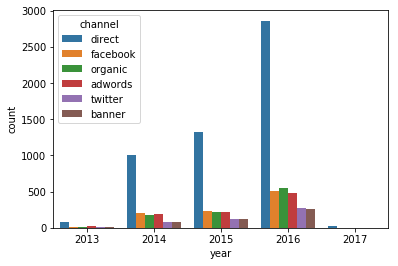

In [198]:
sns.countplot(x='year', data = web_events, hue='channel')

Though this plot shows the count of order (not the dollar values of orders), it is quite evident that direct marketing
brings the most orders. Among the advertising channels, facebook, organic and adwords- all three bring almost the same
amount of orders.

## Summary
Looking at the sales data for Parch and Posey for last 4 years, Standard papers sells the most, and the most effective 
advertising is direct marketing.